In [3]:
%load_ext autoreload
%autoreload 2

import torch
import torch_nf
import numpy as np
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.bijectors import ToInterval
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import Mat
from torch_nf.util import plot_dist
from torch_nf.lfi import train_APT

import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Run SNPE

In [19]:
# Define system
d = 3
mat = Mat(d)


# Opt params
M = 100
num_iters = 2000
R = 4

# data for posterior
x0 = np.array([[d/2, 0.]])

# two-network arch
arch_type = 'autoregressive'
hidden_layers = [50]
support_layer = ToInterval(mat.D, mat.lb, mat.ub)

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

nf = NormFlow(mat.D, arch_type, True, num_stages=1, 
              num_layers=2, num_units=20, support_layer=support_layer)
nf.count_num_params()
print(nf.D_params)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

1292
Sequential(
  (linear1): Linear(in_features=2, out_features=50, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=50, out_features=1292, bias=True)
)


<Figure size 432x288 with 0 Axes>

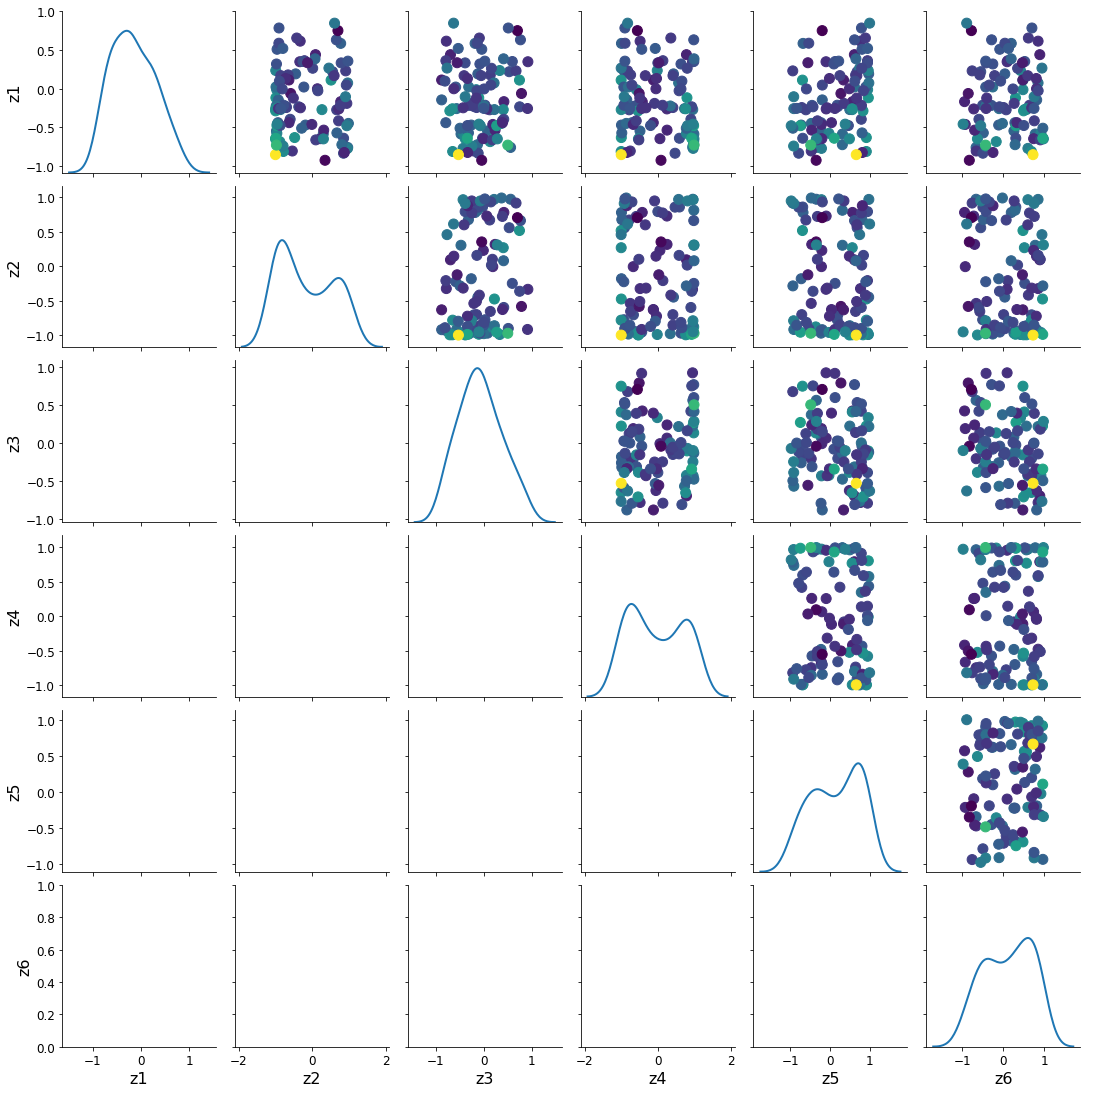

r 1, it 1, loss=5.80E+00, time/it=0.039
r 1, it 100, loss=2.11E+00, time/it=0.032
r 1, it 200, loss=1.77E+00, time/it=0.031
r 1, it 300, loss=1.94E+00, time/it=0.034
r 1, it 400, loss=1.84E+00, time/it=0.032
r 1, it 500, loss=1.36E+00, time/it=0.033
r 1, it 600, loss=1.25E+00, time/it=0.034
r 1, it 700, loss=1.29E+00, time/it=0.034
r 1, it 800, loss=2.11E+00, time/it=0.034
r 1, it 900, loss=1.28E+00, time/it=0.034
r 1, it 1000, loss=9.74E-01, time/it=0.035
r 1, it 1100, loss=9.62E-01, time/it=0.035
r 1, it 1200, loss=1.26E+00, time/it=0.036
r 1, it 1300, loss=1.16E+00, time/it=0.036
r 1, it 1400, loss=9.03E-01, time/it=0.035
r 1, it 1500, loss=6.04E-01, time/it=0.033
r 1, it 1600, loss=7.72E-01, time/it=0.035
r 1, it 1700, loss=7.27E-01, time/it=0.035
r 1, it 1800, loss=8.24E-01, time/it=0.036
r 1, it 1900, loss=7.50E-01, time/it=0.037
r 1, it 2000, loss=5.57E-01, time/it=0.036


<Figure size 432x288 with 0 Axes>

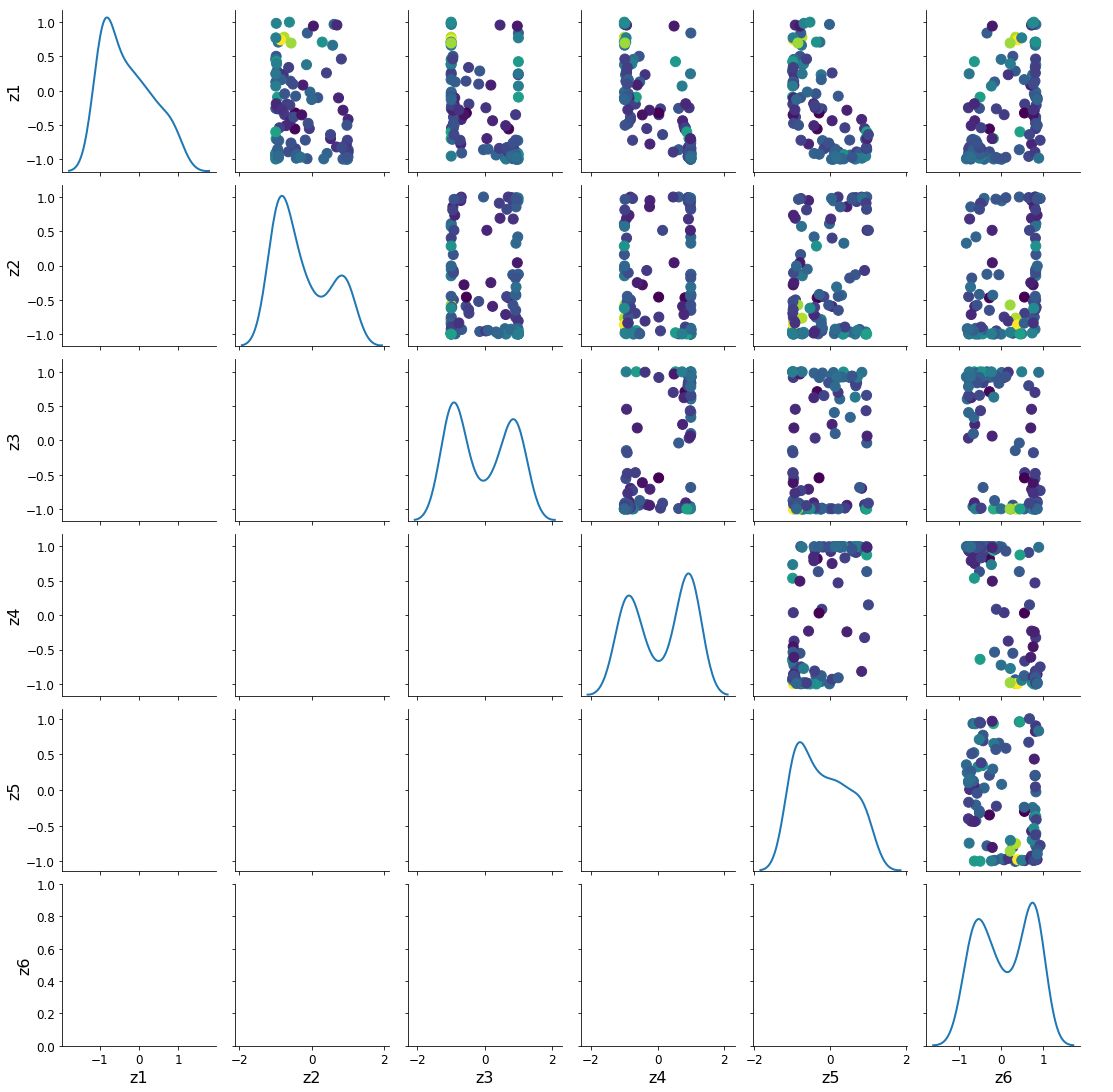

r 2, it 100, loss=2.56E+00, time/it=0.034
r 2, it 200, loss=2.42E+00, time/it=0.036
r 2, it 300, loss=2.00E+00, time/it=0.034
r 2, it 400, loss=1.86E+00, time/it=0.034
r 2, it 500, loss=1.83E+00, time/it=0.034
r 2, it 600, loss=2.16E+00, time/it=0.034
r 2, it 700, loss=1.67E+00, time/it=0.032
r 2, it 800, loss=2.25E+00, time/it=0.034
r 2, it 900, loss=1.60E+00, time/it=0.035
r 2, it 1000, loss=1.68E+00, time/it=0.035
r 2, it 1100, loss=1.29E+00, time/it=0.034
r 2, it 1200, loss=1.18E+00, time/it=0.035
r 2, it 1300, loss=1.53E+00, time/it=0.035
r 2, it 1400, loss=1.73E+00, time/it=0.035
r 2, it 1500, loss=1.66E+00, time/it=0.034
r 2, it 1600, loss=1.53E+00, time/it=0.035
r 2, it 1700, loss=1.60E+00, time/it=0.035
r 2, it 1800, loss=9.65E-01, time/it=0.035
r 2, it 1900, loss=1.43E+00, time/it=0.035
r 2, it 2000, loss=9.78E-01, time/it=0.036


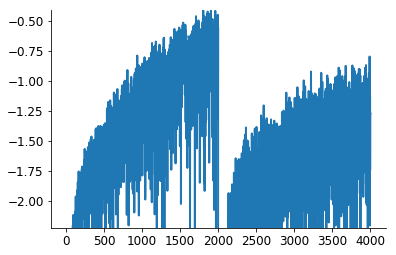

<Figure size 432x288 with 0 Axes>

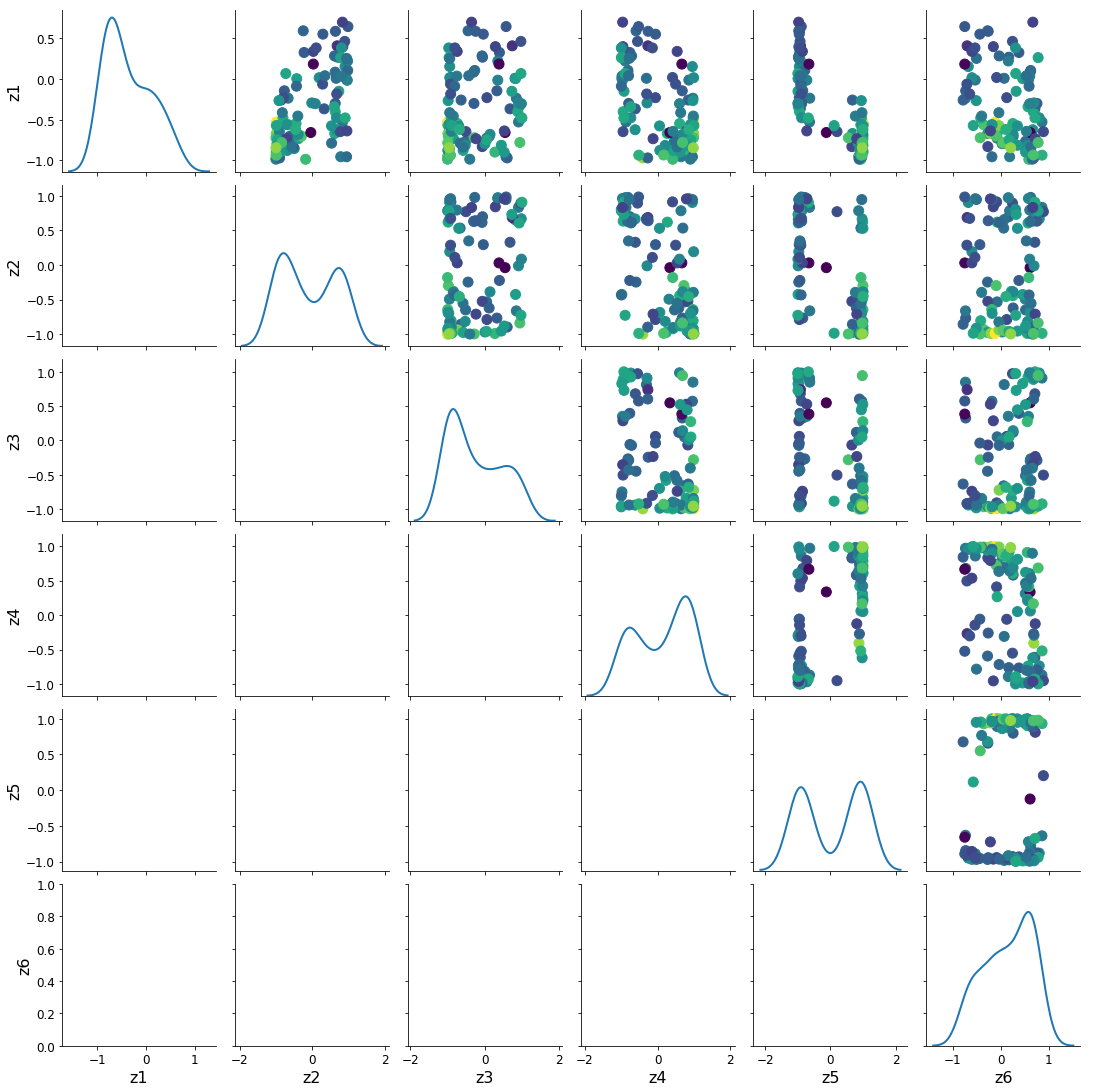

r 3, it 100, loss=2.08E+00, time/it=0.034
r 3, it 200, loss=2.28E+00, time/it=0.034
r 3, it 300, loss=1.85E+00, time/it=0.034
r 3, it 400, loss=2.29E+00, time/it=0.034
r 3, it 500, loss=1.53E+00, time/it=0.034
r 3, it 600, loss=1.87E+00, time/it=0.034
r 3, it 700, loss=2.23E+00, time/it=0.034
r 3, it 800, loss=2.09E+00, time/it=0.034
r 3, it 900, loss=1.57E+00, time/it=0.034
r 3, it 1000, loss=2.15E+00, time/it=0.033
r 3, it 1100, loss=1.45E+00, time/it=0.033
r 3, it 1200, loss=1.88E+00, time/it=0.032
r 3, it 1300, loss=1.80E+00, time/it=0.032
r 3, it 1400, loss=1.77E+00, time/it=0.034
r 3, it 1500, loss=1.80E+00, time/it=0.033
r 3, it 1600, loss=1.46E+00, time/it=0.034
r 3, it 1700, loss=3.51E+00, time/it=0.035
r 3, it 1800, loss=1.53E+00, time/it=0.034
r 3, it 1900, loss=1.78E+00, time/it=0.034
r 3, it 2000, loss=1.69E+00, time/it=0.034


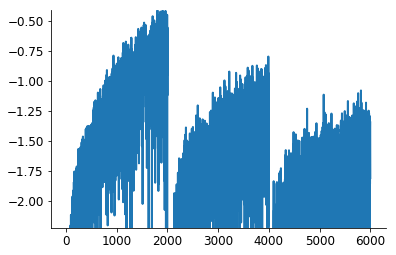

<Figure size 432x288 with 0 Axes>

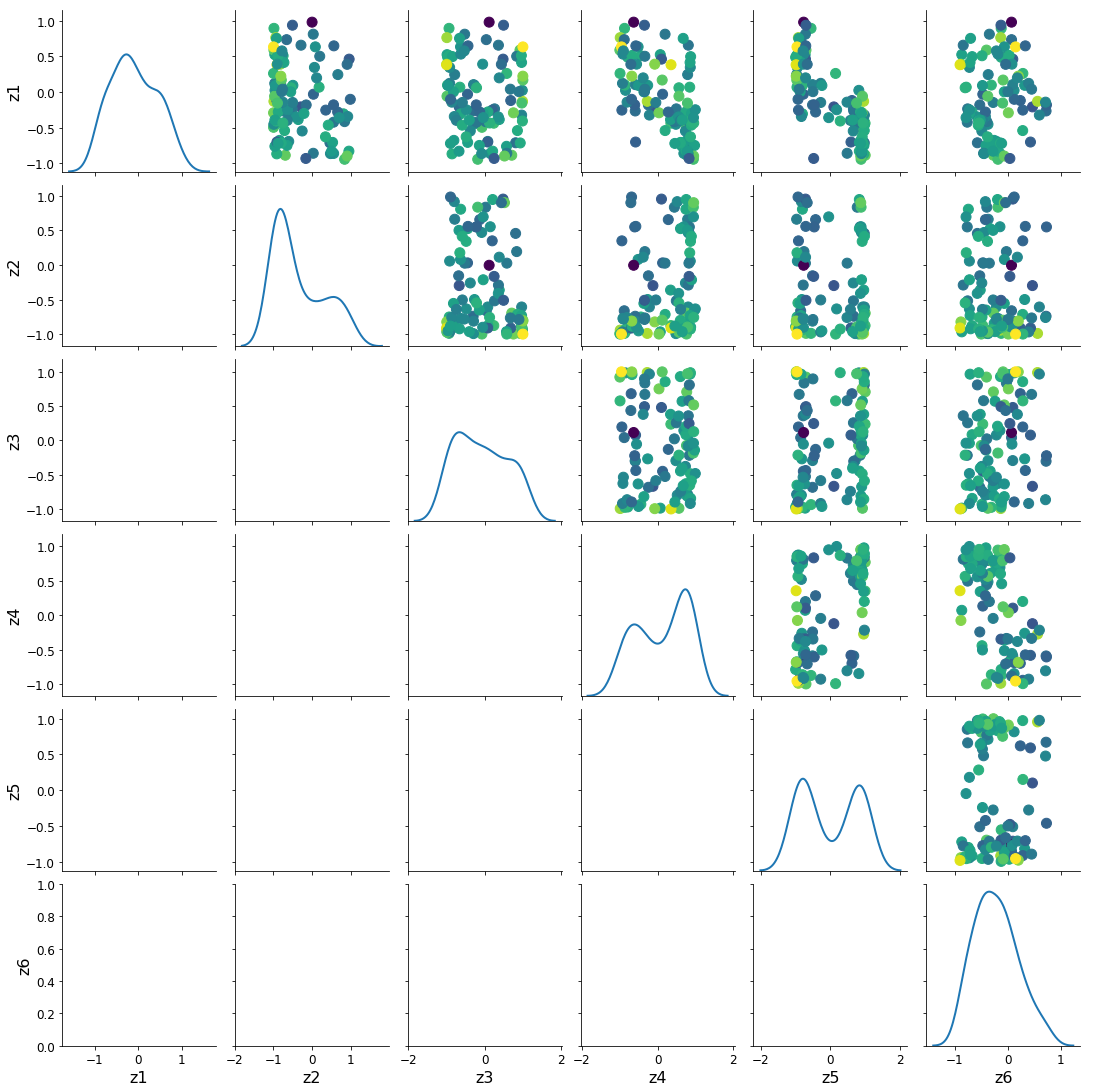

r 4, it 100, loss=2.07E+00, time/it=0.035
r 4, it 200, loss=2.22E+00, time/it=0.034
r 4, it 300, loss=2.12E+00, time/it=0.033
r 4, it 400, loss=2.25E+00, time/it=0.034
r 4, it 500, loss=2.34E+00, time/it=0.034
r 4, it 600, loss=2.42E+00, time/it=0.033
r 4, it 700, loss=2.14E+00, time/it=0.034
r 4, it 800, loss=3.45E+00, time/it=0.034
r 4, it 900, loss=1.77E+00, time/it=0.034
r 4, it 1000, loss=1.78E+00, time/it=0.034
r 4, it 1100, loss=2.10E+00, time/it=0.034
r 4, it 1200, loss=1.94E+00, time/it=0.033
r 4, it 1300, loss=2.71E+00, time/it=0.034
r 4, it 1400, loss=2.04E+00, time/it=0.034
r 4, it 1500, loss=2.76E+00, time/it=0.034
r 4, it 1600, loss=1.68E+00, time/it=0.034
r 4, it 1700, loss=1.78E+00, time/it=0.034
r 4, it 1800, loss=1.71E+00, time/it=0.034
r 4, it 1900, loss=1.71E+00, time/it=0.034
r 4, it 2000, loss=1.56E+00, time/it=0.034


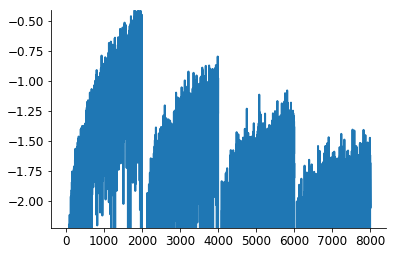

<Figure size 432x288 with 0 Axes>

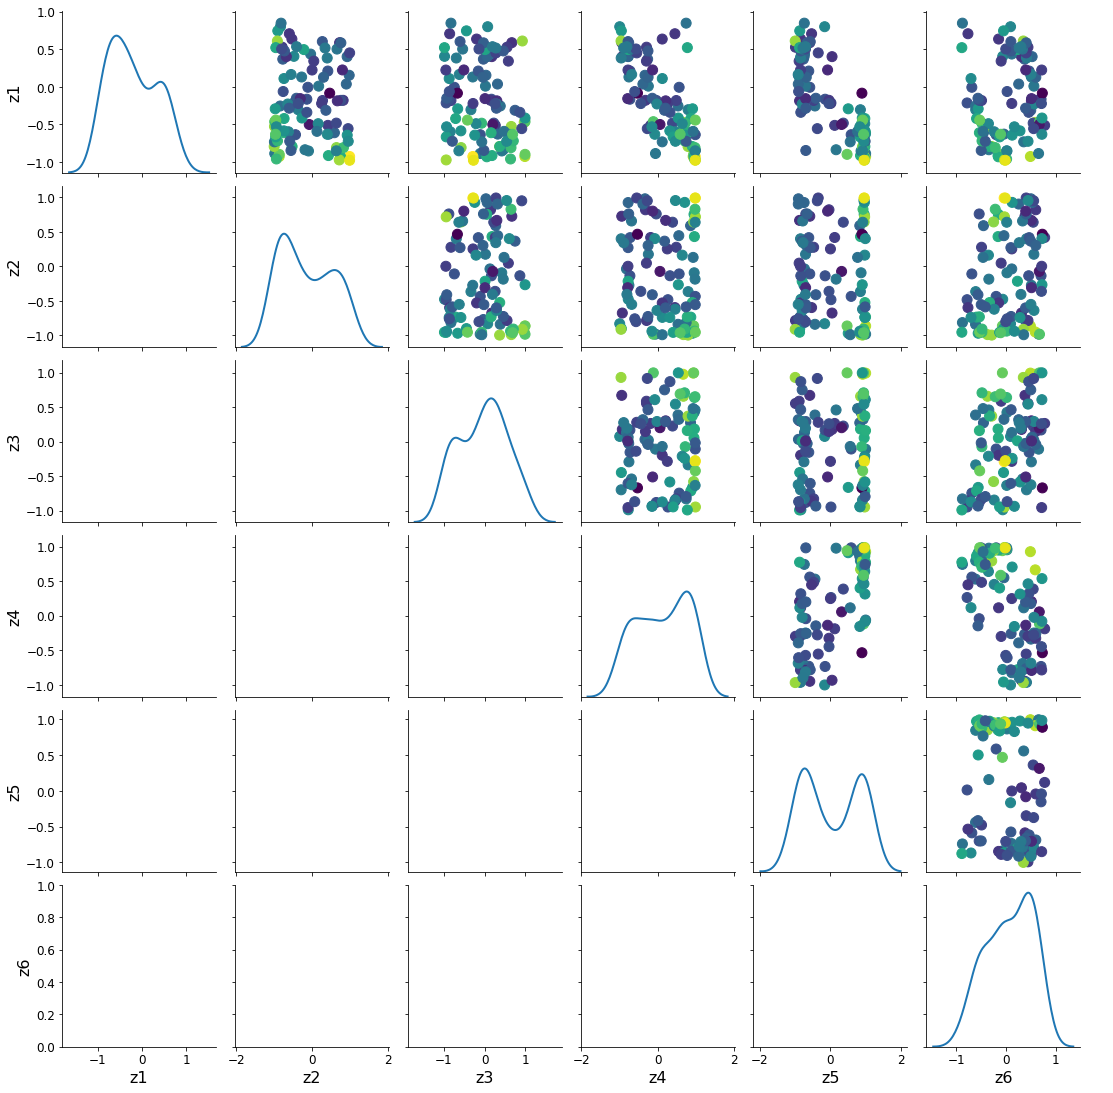

In [20]:
cnf, losses, zs, log_probs, it_time = train_APT(
    cnf, 
    mat, 
    x0, 
    M=M, 
    R=R, 
    num_iters=num_iters, 
    verbose=True
)

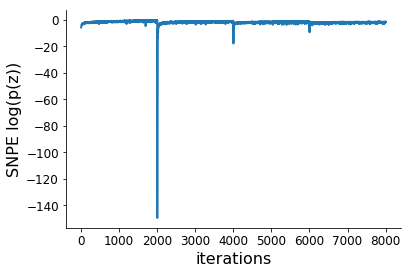

In [21]:
plt.figure()
plt.plot(-losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.show()

In [22]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

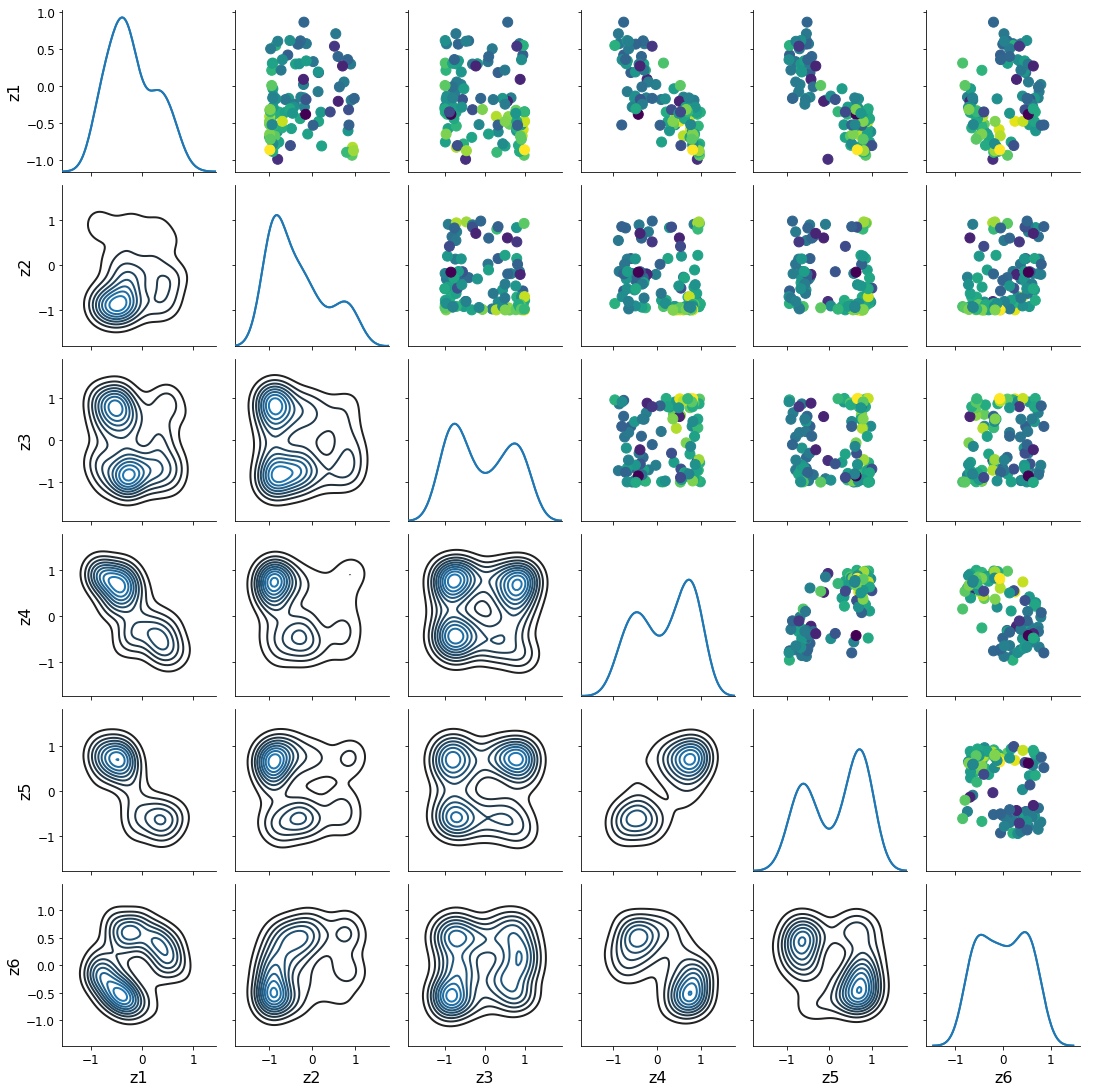

In [23]:
plt.figure()
plot_dist(z.detach().numpy()[0], log_prob.detach().numpy()[0], kde=True)
plt.show()

In [24]:
_z = z.detach().numpy()
print(_z.shape)

(1, 100, 6)


[[ 4.53413932e-01 -7.44220018e-02]
 [-8.01582185e-02  6.85490221e-02]
 [-2.62378296e-01  6.64659828e-01]
 [-1.56540323e+00  9.84720513e-02]
 [-4.62832373e-01 -2.86993787e-01]
 [-1.44737128e+00  4.46571380e-01]
 [ 5.72319656e-01  8.62740725e-03]
 [-2.02271583e-01  7.92362601e-01]
 [ 9.22699275e-02 -2.77947649e-01]
 [-1.94696067e+00  2.96755522e-01]
 [-6.77600961e-01 -4.87269506e-01]
 [ 4.33517536e-01  3.37466359e-01]
 [ 2.97646409e-01  1.52889989e-01]
 [ 4.06684048e-01 -2.01647222e-01]
 [ 1.50905953e+00  4.32756543e-03]
 [-2.69921839e-01  3.86003949e-01]
 [-3.24817760e-01 -5.27960569e-01]
 [ 5.85114645e-01  3.98717489e-01]
 [ 8.91307856e-01  7.88924396e-02]
 [ 7.49041047e-02  2.25704610e-02]
 [-1.70423601e-01 -4.39765424e-01]
 [-6.48251662e-01 -1.10586196e-01]
 [ 7.33459315e-02 -3.84405658e-01]
 [ 4.53693862e-01  3.70624095e-01]
 [ 1.36934263e+00 -3.86336982e-01]
 [-7.06671350e-01 -3.83149654e-01]
 [ 6.39627924e-01 -5.09628952e-02]
 [ 7.63949724e-01 -3.25191360e-01]
 [-1.11997029e+00  6

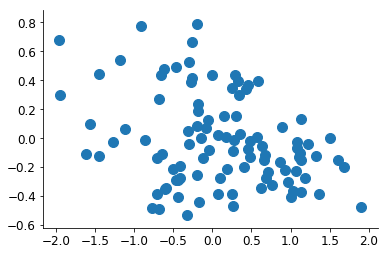

In [25]:
T_x = mat.simulate(_z[0])
print(T_x)
plt.figure()
plt.scatter(T_x[:,0], T_x[:,1])
plt.show()